<a href="https://colab.research.google.com/github/viktoruebelhart/Keras_NPL_News/blob/main/Keras_NPL_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##News Portal.

This portal aims to develop an automated solution for classifying news articles into predefined categories. By leveraging machine learning, we intend to streamline the process of sorting vast amounts of news content efficiently and accurately.

The categories for classification are as follows:

-World

-Sports

-Business

-Science and Technology

In [1]:
url ='https://github.com/allanspadini/curso-tensorflow-proxima-palavra/raw/main/dados/train.zip'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(url, header=None,names=['ClassIndex', 'Title', 'Description'])

In [4]:
df.head()

,ClassIndex,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ClassIndex   120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [6]:
df['Text'] = df['Title'] + ' ' + ['Description']

In [7]:
df['Text']

,Text
0,Wall St. Bears Claw Back Into the Black (Reute...
1,Carlyle Looks Toward Commercial Aerospace (Reu...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,Iraq Halts Oil Exports from Main Southern Pipe...
4,"Oil prices soar to all-time record, posing new..."
...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...
119996,Renteria signing a top-shelf deal Description
119997,Saban not going to Dolphins yet Description
119998,Today's NFL games Description


In [8]:
df.head()

,ClassIndex,Title,Description,Text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [9]:
df['ClassIndex'].unique()

array([3, 4, 2, 1])

In [10]:
df['ClassIndex'].value_counts()

,count
ClassIndex,
3,30000
4,30000
2,30000
1,30000


We will pass the data to TensorFlow in numerical form, but we need to ensure that this data starts from the value 0

In [11]:
df['ClassIndex'] = df['ClassIndex'] - 1

In [12]:
df['ClassIndex'].unique()

array([2, 3, 1, 0])

We will need to split the data into one part to train the Deep Learning model and another to validate it.

To separate them, we will use the SK Learn library

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
  x_train, x_test, y_train, y_test = train_test_split(df['Text'].values, df['ClassIndex'].values, test_size=0.20, random_state=4256)

We need to transform our texts into numbers. This is because, up until now, we have performed the general overview process and divided our data into training and testing. In addition, we have stored them in the variables X and Y, our input and the expected output of the neural network.

However, in the variable X, we have the data in text. Therefore, we need to convert this data to the numerical format, which is the format that the neural network understands to process.

In [15]:
import tensorflow as tf

In [16]:
vocab_size = 1000

In [17]:
encoder = tf.keras.layers.TextVectorization(max_tokens=vocab_size)

In [18]:
encoder.adapt(x_train)

In [19]:
encoder_vocab = encoder.get_vocabulary()
encoder_vocab[:20]

['',
 '[UNK]',
 'description',
 'to',
 'in',
 'for',
 'on',
 'of',
 'ap',
 'the',
 '39s',
 'us',
 'a',
 'at',
 'reuters',
 'with',
 'new',
 'as',
 '39',
 'up']

In [ ]:
example = "Today's NFL games PITTSBURG at NY GIANTS"

In [ ]:
encoder(example)

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([  1, 402, 251,   1,  13,   1, 303])>

Now, we will build the neural network that will perform this classification process.

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        mask_zero=True
    ),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
x_test[1]

"Palestinians Pour Out Grief Over Arafat's Death Description"

In [ ]:
model.predict(x_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


array([[0.24972457, 0.25161287, 0.24874371, 0.24991888]], dtype=float32)

As a prediction, we obtain a vector with 4 values. These values ​​represent the probability of each class being the same. To get a specific value, in addition to predict, we have to get the highest value.

In [ ]:
model.predict(x_test[:1]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([1])

In [ ]:
y_test[1]

0

The y_test is 0. This happens because we have a very close probability for each of the classes, since our neural network was started with random weights.

So, we need to teach the neural network to deal with our problem.

Training the Model

In [20]:
epochs = 10

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3767 - loss: 1.3622 - val_accuracy: 0.6121 - val_loss: 1.1831
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6395 - loss: 1.0986 - val_accuracy: 0.6870 - val_loss: 0.9078
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6993 - loss: 0.8717 - val_accuracy: 0.7172 - val_loss: 0.7922
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7213 - loss: 0.7710 - val_accuracy: 0.7284 - val_loss: 0.7416
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7304 - loss: 0.7301 - val_accuracy: 0.7360 - val_loss: 0.7161
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7394 - loss: 0.7017 - val_accuracy: 0.7388 - val_loss: 0.7014
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7422 - loss: 0.6875 - val_accuracy: 0.7420 - val_loss: 0.6894
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7425 - loss: 0.6827 - val_accurac

In [21]:
import matplotlib.pyplot as plt

In [22]:
def plot_results(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')

    plt.show()

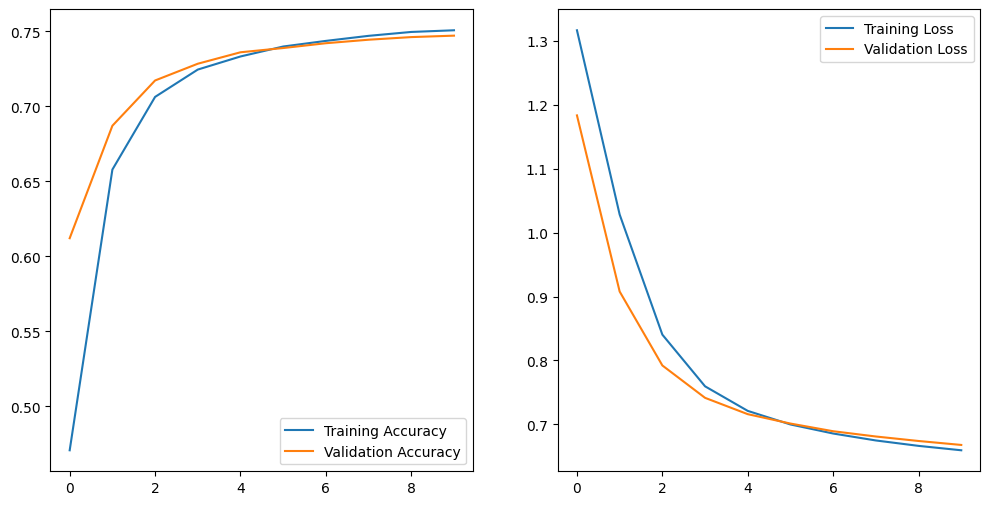

In [ ]:
plot_results(history,epochs)

From these graphs, we can visualize the evolution of the model's accuracy during training. We can see that the model behaves well, achieving similar accuracy rates for training and testing data, which is great.

But, this training result can be improved

To do this, we can add other layers to the neural network that make sense so that it can better perform the classification task.

One of the possible types of layers are convolutional layers.

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        mask_zero=True
    ),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv1D(128, kernel_size=4, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/layer.py:932: UserWarning: Layer 'conv1d_6' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3858 - loss: 1.2621 - val_accuracy: 0.6798 - val_loss: 0.8299
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6854 - loss: 0.8267 - val_accuracy: 0.7185 - val_loss: 0.7524
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7182 - loss: 0.7585 - val_accuracy: 0.7294 - val_loss: 0.7253
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7305 - loss: 0.7250 - val_accuracy: 0.7339 - val_loss: 0.7017
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7325 - loss: 0.7073 - val_accuracy: 0.7403 - val_loss: 0.6873
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7380 - loss: 0.6942 - val_accuracy: 0.7404 - val_loss: 0.6786
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7401 - loss: 0.6857 - val_accuracy: 0.7428 - val_loss: 0.6720
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7435 - loss: 0.6735 - val_accurac

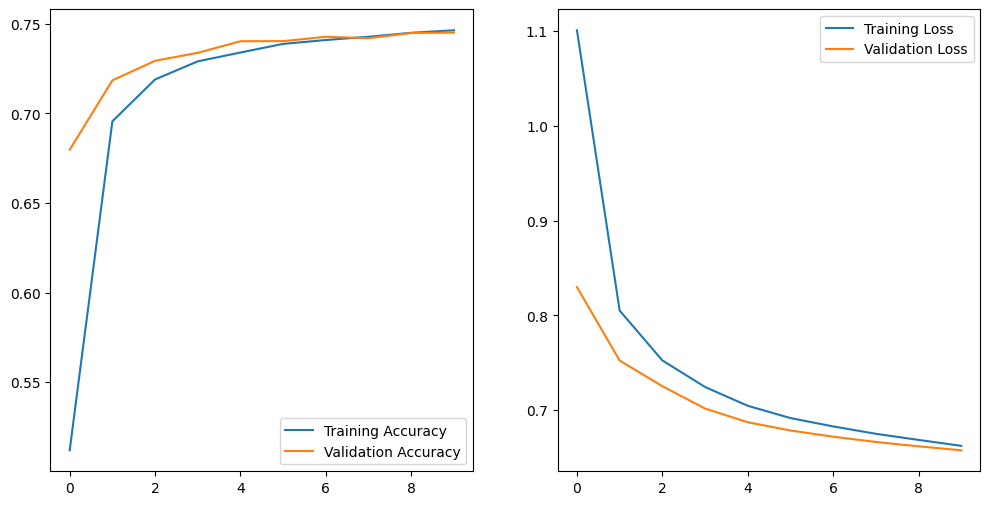

In [ ]:
plot_results(history,epochs)

Note that we are around the same values ​​obtained using the neural network without convolutional layers. Convolutional layers can indeed be beneficial for use in conjunction with text data, but for the example worked on, they did not present as many benefits.

Let's explore some strategies to try to improve the use of the neural network for text data. To do this, we will apply the LSTM layers

Initially, we want to explore increasing the output dimension (output_dim) of the Embedding() layer. This will increase the vector space and the model's understanding of the text data, which will potentially increase the likelihood of finding better answers.

That said, let's increase the value of output_dim from 16 to 64.

Adding the two-dimensional parameter
We don't just want to add a simple LSTM layer. The LSTM layer understands sequential data, such as applied text; it understands data by reading from left to right, for example.

However, we can add functionality to allow the layer to understand data from right to left as well. This way, she will be able to understand the data in both directions, which will allow her to capture elements that appear both at the beginning and at the end of the texts.

To do this, we will wrap the LSTM layer in a bidirectional parameter, so right before the first tf.keras.layers.LSTM(), we will add tf.keras.layers.Bidirectional().

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 20

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20


   1/3000 ━━━━━━━━━━━━━━━━━━━━ 3:13:40 4s/step - accuracy: 0.3438 - loss: 1.3853

2024-10-14 22:26:08.476245: E tensorflow/core/util/util.cc:131] oneDNN supports DT_BOOL only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.4656 - loss: 1.1542 - val_accuracy: 0.7306 - val_loss: 0.7167
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7278 - loss: 0.7368 - val_accuracy: 0.7372 - val_loss: 0.6904
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7333 - loss: 0.7075 - val_accuracy: 0.7384 - val_loss: 0.6836
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.7366 - loss: 0.6983 - val_accuracy: 0.7403 - val_loss: 0.6784
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.7405 - loss: 0.6874 - val_accuracy: 0.7401 - val_loss: 0.6751
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.7417 - loss: 0.6824 - val_accuracy: 0.7447 - val_loss: 0.6666
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.7446 - loss: 0.6737 - val_accuracy: 0.7483 - val_loss: 0.6568
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.7508 - loss: 0.66

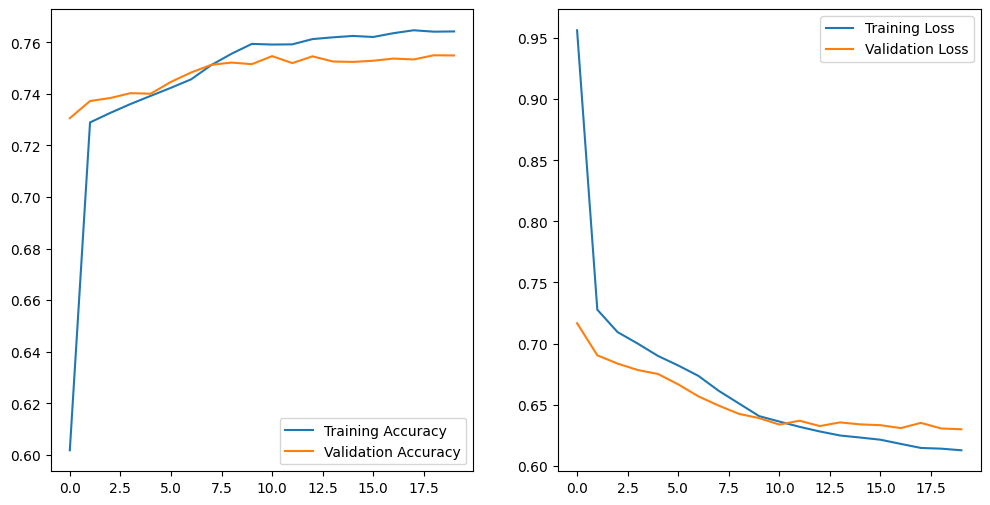

In [ ]:
plot_results(history,epochs)

Apparently, there was a slightly better fit to the training data than to the test data, but even so, the test data was on a higher scale than in the previous case, where we used only the dense layers, without any strategy and without increasing Embedding().

However, will the prediction made at the end of the first class work well?

In [ ]:
model.predict(x_test[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[9.9985552e-01, 1.9480502e-05, 3.6630907e-05, 8.8442997e-05]],
      dtype=float32)

In [ ]:
model.predict(x_test[1:2]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([0])

In [ ]:
y_test[1]

0

Evidently, we made mistakes for other values, since the accuracy rate is around 75%, but, even so, we had an improvement in relation to the case where we started with random weights.

We train the neural network using different architectures. We try to use convolutional layers and also LSTM layers, but this process is quite empirical. We need trial and error to define the number of neurons in each layer, for example.

Now let's explore an alternative to this process so that we can test several different architectures without having to completely redefine the structure each time.

In [24]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.7 MB/s eta 0:00:00


In [25]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
    model = tf.keras.Sequential([
        encoder,
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32),
            mask_zero=True
        ),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
            return_sequences=True
        )),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            units=hp.Int('lstm_units', min_value=16, max_value=64, step=16)
        )),
        tf.keras.layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In addition to defining our function, we need to pass this function and the structure of the search it will perform to KerasTuner.

To create this search structure, we will define what we will call a tuner, because we are tuning the neural network.

In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='classification_optimization'
)


We are carrying out the tuning process and testing various structures for the neural network.

Normally, when we are testing various structures for the neural network, we apply the validation process.

Currently, we are applying the validation process by dividing the data into training and testing.

This process is valid, but there are more robust processes, such as the cross-validation process, which performs several random divisions and tests several different data division configurations in training and testing to ensure that our model is working well with data that it does not are using during training.


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def run_tuner(x, y, n_splits=5):
  kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

  for train_index, test_index in kf.split(x):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    tuner.search(x_train_fold, y_train_fold, epochs=10, validation_data=(x_test_fold, y_test_fold))

  best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

  print(f"""
          Hyperparameter search is complete. The optimal number of embedding dimensions is {best_hps.get('embedding_dim')},
          the optimal number of LSTM units is {best_hps.get('lstm_units')}, and
          the optimal number of dense units is {best_hps.get('dense_units')},
          and the ideal dropout rate is {best_hps.get('dropout')}.
    """)

  return best_hps

In [ ]:
best_hps = run_tuner(x_train, y_train)

Trial 30 Complete [00h 06m 45s]
val_accuracy: 0.7540104389190674

Best val_accuracy So Far: 0.7584896087646484
Total elapsed time: 01h 18m 30s

          Hyperparameter search is complete. The optimal number of embedding dimensions is 128,
          the optimal number of LSTM units is 96, and
          the optimal number of dense units is 96,
          and the ideal dropout rate is 0.30000000000000004.
    


After obtaining the best parameters of the network, the ideal is that we run the network again to check our results and see if we are obtaining a better result or not with these hyperparameters.

In [27]:
final_model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=128,
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        units=96,
        return_sequences=True
    )),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        units=48
    )),
    tf.keras.layers.Dense(
        units=96,
        activation='relu'
    ),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [28]:
final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
final_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - accuracy: 0.6624 - loss: 0.8278 - val_accuracy: 0.7420 - val_loss: 0.6607
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.7463 - loss: 0.6591 - val_accuracy: 0.7502 - val_loss: 0.6445
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7552 - loss: 0.6288 - val_accuracy: 0.7533 - val_loss: 0.6301
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.7623 - loss: 0.6107 - val_accuracy: 0.7567 - val_loss: 0.6258
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7695 - loss: 0.5905 - val_accuracy: 0.7582 - val_loss: 0.6271
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.7753 - loss: 0.5708 - val_accuracy: 0.7577 - val_loss: 0.6220
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.7827 - loss: 0.5532 - val_accuracy: 0.7566 - val_loss: 0.6370
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7886 -

We were able to see that there was a much greater adjustment of the data to the training data and there was a similar adjustment to the validation data, but there was still some improvement.

A slightly more interesting evaluation that we can make of this data is by plotting a confusion matrix. We will use the SKLearn function to plot the confusion matrix and for this we will have to make a prediction with the test data.

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
y_pred = final_model.predict(x_test)
y_pred_class = y_pred.argmax(axis=1)

750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [33]:
conf_matrix = confusion_matrix(y_test, y_pred_class)

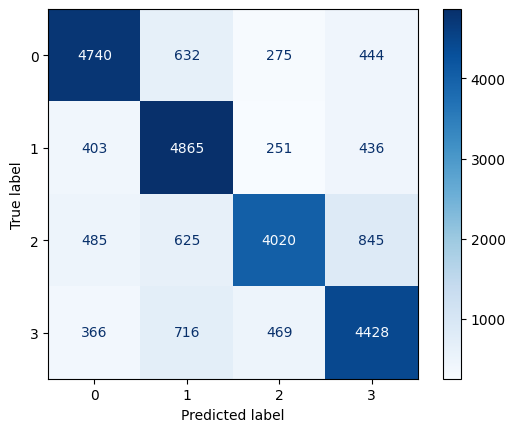

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1,2,3])
disp.plot(cmap=plt.cm.Blues)
plt.show()

For the last two classes, we are aware that there is confusion in the neural network regarding which class is which. He is making a mistake, thinking, for example, that it is class 3 when it should be class 2, and the same thing for class 3, he is thinking that it is class 2 when it should be class 3.

We can stipulate that our model reached its maximum, we were able to extract the maximum potential for this classification process, carrying out all these tests for this case.

We now have a functional model that can take snippets of text and classify them automatically.

Of course, for a neural network classification model, there always needs to be human validation afterwards to check whether these results really match what was expected.